In [2]:
#importing labraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
data=pd.read_csv("SampleSuperstore.csv")
data.head()

,Ship Mode,Segment,Country,City,State,Postal Code,Region,Category,Sub-Category,Sales,Quantity,Discount,Profit
0,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Bookcases,261.9600,2,0.00,41.9136
1,Second Class,Consumer,United States,Henderson,Kentucky,42420,South,Furniture,Chairs,731.9400,3,0.00,219.5820
2,Second Class,Corporate,United States,Los Angeles,California,90036,West,Office Supplies,Labels,14.6200,2,0.00,6.8714
3,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Furniture,Tables,957.5775,5,0.45,-383.0310
4,Standard Class,Consumer,United States,Fort Lauderdale,Florida,33311,South,Office Supplies,Storage,22.3680,2,0.20,2.5164


In [6]:
data.shape

(9994, 13)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Ship Mode     9994 non-null   object 
 1   Segment       9994 non-null   object 
 2   Country       9994 non-null   object 
 3   City          9994 non-null   object 
 4   State         9994 non-null   object 
 5   Postal Code   9994 non-null   int64  
 6   Region        9994 non-null   object 
 7   Category      9994 non-null   object 
 8   Sub-Category  9994 non-null   object 
 9   Sales         9994 non-null   float64
 10  Quantity      9994 non-null   int64  
 11  Discount      9994 non-null   float64
 12  Profit        9994 non-null   float64
dtypes: float64(3), int64(2), object(8)
memory usage: 1015.1+ KB


In [8]:
data.isnull().sum()

Ship Mode       0
Segment         0
Country         0
City            0
State           0
Postal Code     0
Region          0
Category        0
Sub-Category    0
Sales           0
Quantity        0
Discount        0
Profit          0
dtype: int64

In [10]:
data.describe()

,Postal Code,Sales,Quantity,Discount,Profit
count,9994.000000,9994.000000,9994.000000,9994.000000,9994.000000
mean,55190.379428,229.858001,3.789574,0.156203,28.656896
std,32063.693350,623.245101,2.225110,0.206452,234.260108
min,1040.000000,0.444000,1.000000,0.000000,-6599.978000
25%,23223.000000,17.280000,2.000000,0.000000,1.728750
50%,56430.500000,54.490000,3.000000,0.200000,8.666500
75%,90008.000000,209.940000,5.000000,0.200000,29.364000
max,99301.000000,22638.480000,14.000000,0.800000,8399.976000


In [11]:
data.columns

Index(['Ship Mode', 'Segment', 'Country', 'City', 'State', 'Postal Code',
       'Region', 'Category', 'Sub-Category', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')

In [12]:
data['Category'].unique()

array(['Furniture', 'Office Supplies', 'Technology'], dtype=object)

In [16]:
data['Segment'].unique()

array(['Consumer', 'Corporate', 'Home Office'], dtype=object)

In [17]:
data['Region'].unique()

array(['South', 'West', 'Central', 'East'], dtype=object)

In [18]:
data['Ship Mode'].unique()

array(['Second Class', 'Standard Class', 'First Class', 'Same Day'],
      dtype=object)

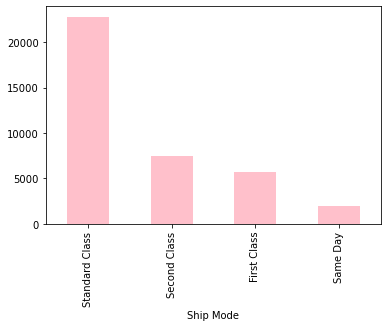

In [39]:
data.groupby('Ship Mode')['Quantity'].sum().sort_values(ascending=False ).plot.bar(color='pink')

In [28]:
data.groupby('Segment')['Quantity'].sum().sort_values(ascending=False ).T

Segment
Consumer       19521
Corporate      11608
Home Office     6744
Name: Quantity, dtype: int64

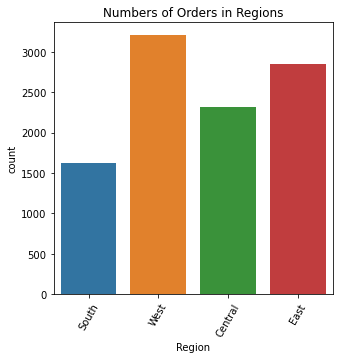

In [46]:
plt.figure(figsize=(5,5))
sns.countplot(data['Region'])
plt.xticks(rotation=60)
plt.title('Numbers of Orders in Regions')
plt.show()

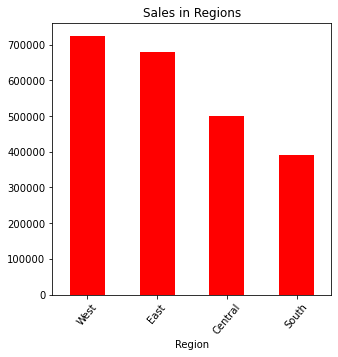

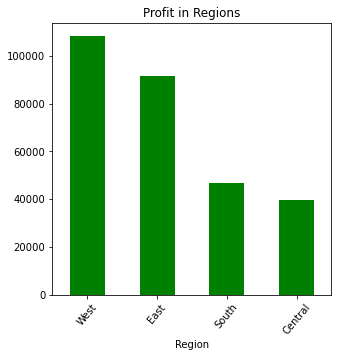

In [57]:
plt.figure(figsize=(5,5))
data.groupby('Region')['Sales'].sum().sort_values( ascending=False,).plot.bar(color='r')
plt.xticks(rotation=50)
plt.title('Sales in Regions')

plt.figure(figsize=(5,5))
data.groupby('Region')['Profit'].sum().sort_values( ascending=False,).plot.bar(color='g')
plt.xticks(rotation=50)
plt.title('Profit in Regions')


plt.show()

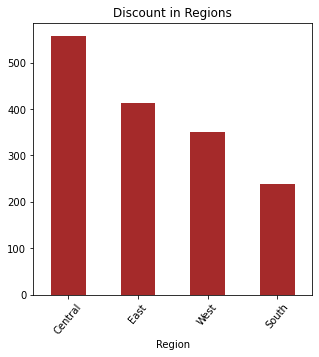

In [59]:
plt.figure(figsize=(5,5))
data.groupby('Region')['Discount'].sum().sort_values( ascending=False,).plot.bar(color='brown')
plt.xticks(rotation=50)
plt.title('Discount in Regions')
plt.show()

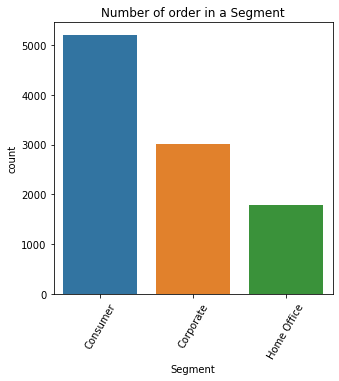

In [61]:
plt.figure(figsize=(5,5))
sns.countplot(data['Segment'])
plt.title('Number of order in a Segment')
plt.xticks(rotation=60)
plt.show()

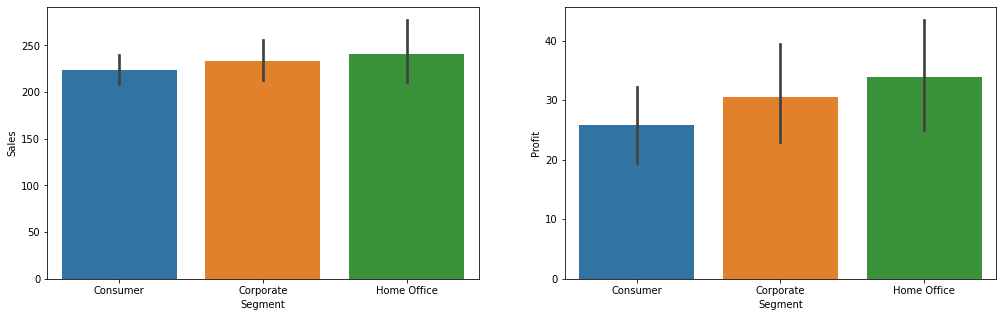

In [67]:
fig,ax=plt.subplots(1,2,figsize=(17,5))
sns.barplot(x=data.Segment, y=data.Sales, ax=ax[0])
sns.barplot(x=data.Segment, y=data.Profit, ax=ax[1])

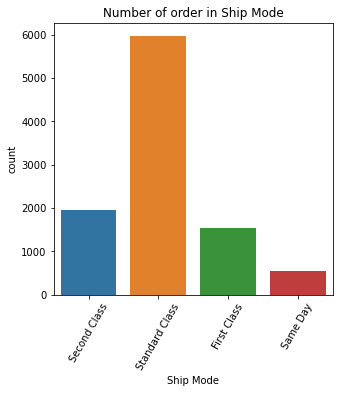

In [68]:
plt.figure(figsize=(5,5))
sns.countplot(data['Ship Mode'])
plt.title('Number of order in Ship Mode')
plt.xticks(rotation=60)
plt.show()

In [79]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x=data.Ship Mode, y=data.Sales, ax=ax[0])
sns.barplot(x=data.Ship Mode, y=data.Profit, ax=ax[1])
sns.barplot(x=data.Ship Mode, y=data.Discount, ax=ax[2])

SyntaxError: invalid syntax (<ipython-input-79-40d10d5dce13>, line 2)

Text(0.5, 1.0, "Discount in Region '(Category wise)'")

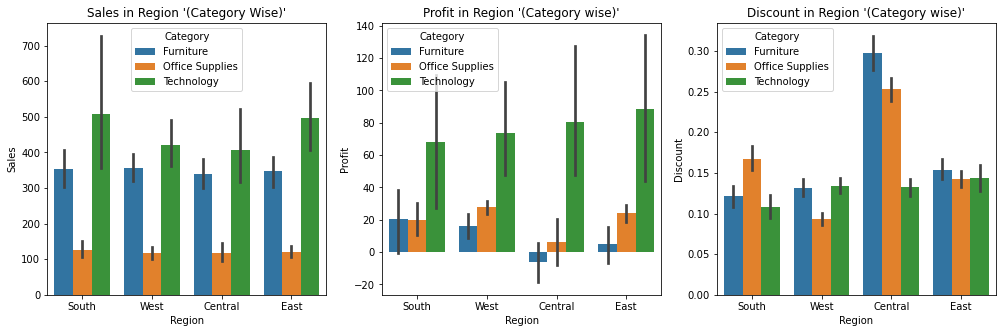

In [86]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Region',y='Sales',hue='Category',data=data,ax=ax[0]).set_title("Sales in Region '(Category Wise)'")
sns.barplot(x='Region' ,y='Profit',hue='Category',data=data,ax=ax[1]).set_title("Profit in Region '(Category wise)'")
sns.barplot(x='Region' ,y='Discount', hue='Category',data=data,ax=ax[2]).set_title("Discount in Region '(Category wise)'")

* It's clear that number of sales of "Office Supplies" is constant but facing loss espically in Central region of Huge Discount,
sames goes with "Furniture" category.
* On the other hand sales of Technology was maximum in both South and East, with increase in profits espically 
with around 13% discount


Text(0.5, 1.0, "Discount in a Segment '(Category wise)'")

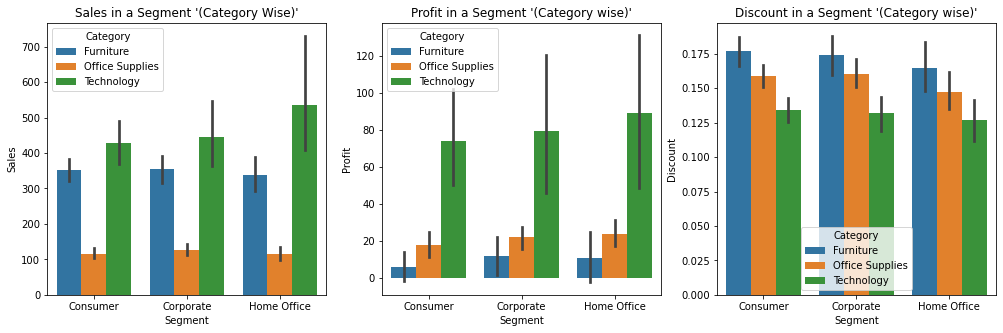

In [90]:
fig,ax=plt.subplots(1,3,figsize=(17,5))
sns.barplot(x='Segment',y='Sales',hue='Category',data=data,ax=ax[0]).set_title("Sales in a Segment '(Category Wise)'")
sns.barplot(x='Segment' ,y='Profit',hue='Category',data=data,ax=ax[1]).set_title("Profit in a Segment '(Category wise)'")
sns.barplot(x='Segment' ,y='Discount', hue='Category',data=data,ax=ax[2]).set_title("Discount in a Segment '(Category wise)'")

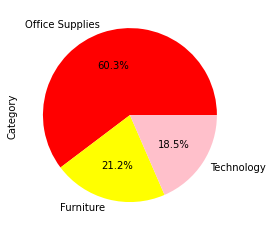

In [95]:
color=['red','yellow','pink']
data['Category'].value_counts().plot.pie(autopct='%1.1f%%',colors=color)

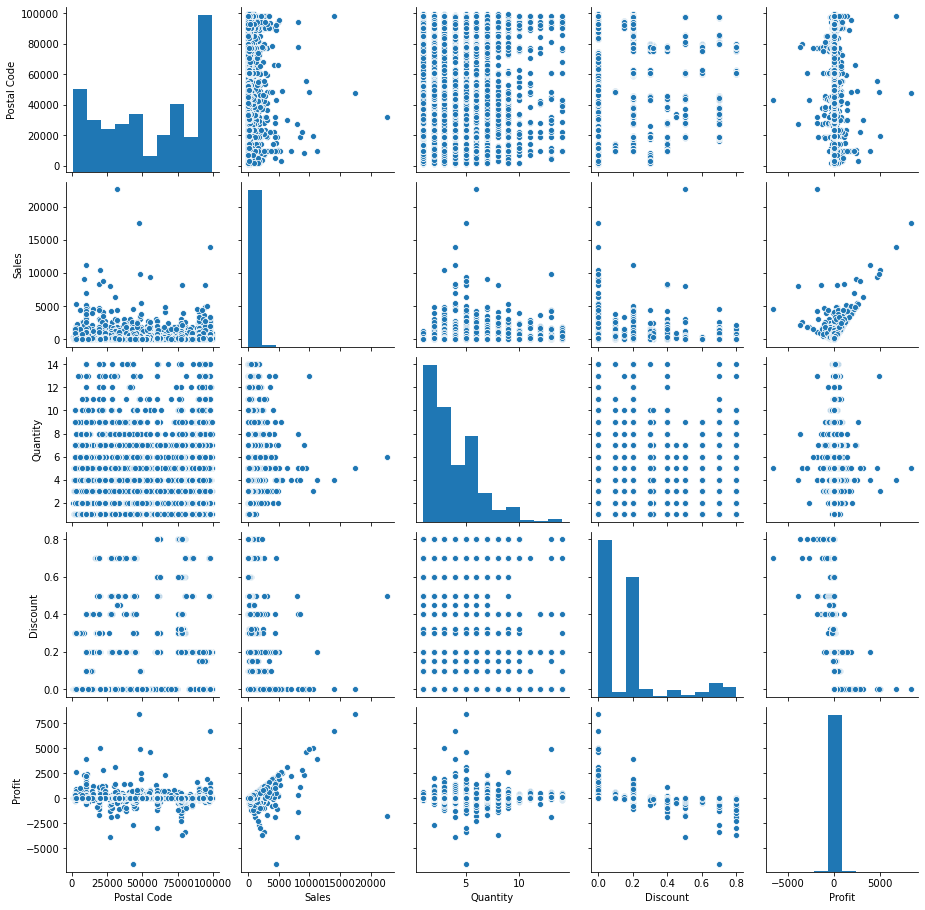

In [96]:
sns.pairplot(data)

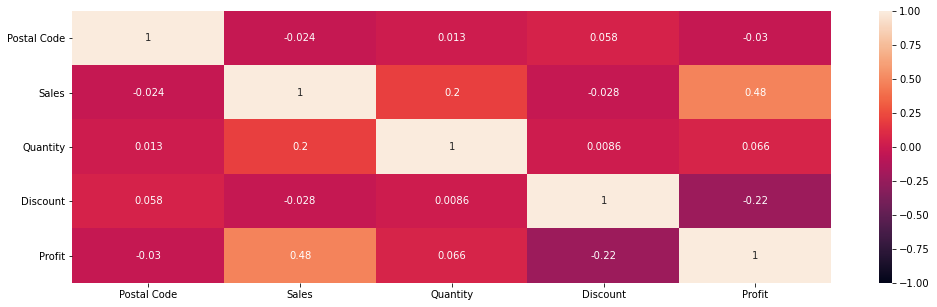

In [99]:
plt.figure(figsize=(17,5))
sns.heatmap(data.corr(),annot=True, vmin=-1, vmax=1)

In [ ]:
sns.set_style('whitegrid')
sns.violinplot(data['Survived'],data['Age']).